#### Test 2: Run some random predictions and plot the corresponding image

Using cache found in C:\Users\basu/.cache\torch\hub\pytorch_vision_v0.10.0


torch.Size([10, 4])


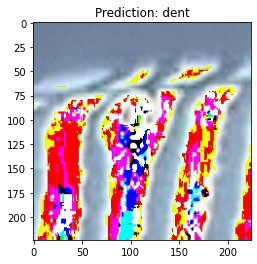

torch.Size([10, 4])


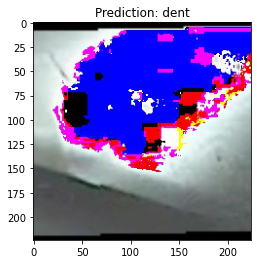

torch.Size([10, 4])


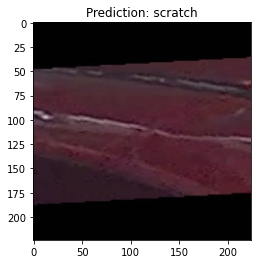

torch.Size([10, 4])


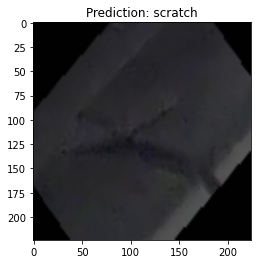

torch.Size([10, 4])


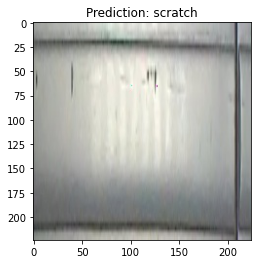

torch.Size([10, 4])


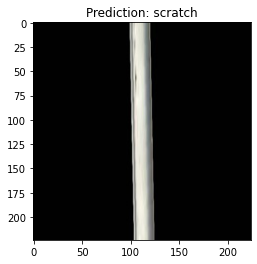

torch.Size([10, 4])


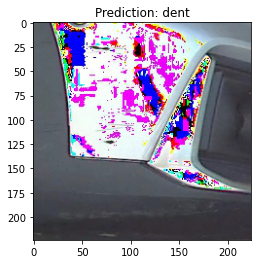

torch.Size([10, 4])


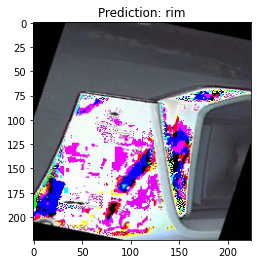

torch.Size([10, 4])


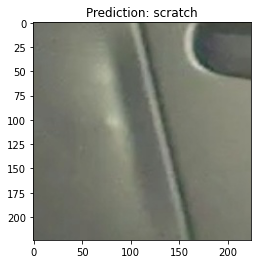

torch.Size([10, 4])


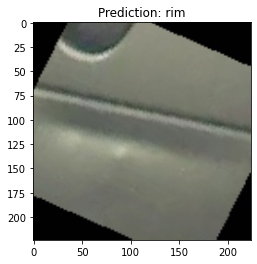

In [2]:
import torch.nn as nn
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# -----------------------------------------------------------------------------
# Define linear model
class net(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, n_hidden_3, out_dim):
        super().__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_dim, n_hidden_1))
        self.layer2 = nn.Sequential(nn.Linear(n_hidden_1, n_hidden_2))
        self.layer3 = nn.Sequential(nn.Linear(n_hidden_2, n_hidden_3))
        self.layer4 = nn.Sequential(nn.Linear(n_hidden_3, out_dim))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x
# -----------------------------------------------------------------------------


# Load data
image_path = r"C:\Users\basu\Downloads\Normalized_Images\Normalized_Images"
image_names = os.listdir(image_path)

# First 10 images
image_names = image_names[0:10]

# Initiate the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
extralayers = net(1000, 200, 50, 10, 4)
resnet = torch.hub.load("pytorch/vision:v0.10.0", "resnet18", pretrained=True)
model = nn.Sequential(resnet, extralayers)
model.to(device)

# Load weights
weights = r"C:\Users\basu\Desktop\TUM MA\AMI\Group15\model_weights.pth"
model = torch.load(weights, map_location=torch.device('cpu'))

# Read image and convert to tensor 
images = []
for name in image_names:
    img = mpimg.imread(image_path + "/" + name)
    images.append(img)
images = np.array(images).reshape(-1,3,224,224)

# Convert image to tensor
images = torch.from_numpy(images)

# Get raw predictions (from linear layers)
with torch.no_grad():
    predicted_outputs_raw = model(images.float()) 

# Apply softmax and get probabilities 
softmax = torch.nn.Softmax(dim = 1)
predicted_outputs = softmax(predicted_outputs_raw)
probabilities = torch.round(predicted_outputs, decimals=2)
_, predicted_max_idx = torch.max(probabilities, 1)


# Plot images with predictions
for i,name in enumerate(image_names):
    img = mpimg.imread(image_path + "/" + name)
    _, highest_idx = torch.max(probabilities[i], 0)
    if highest_idx == 0:
        prediction = "other"
    elif highest_idx == 1:
        prediction = "rim"
    elif highest_idx == 2:
        prediction = "scratch"
    elif highest_idx == 3:
        prediction = "dent"

    print(probabilities.size())
    plt.imshow(img)
    plt.title(f"Prediction: {prediction}")
    plt.show()